In [1]:
# 데이터 준비 
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


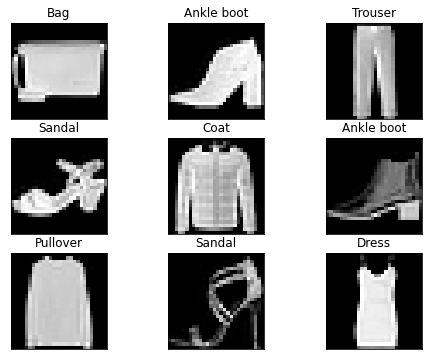

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 이미지 확인
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
 'Dress', 'Coat', 'Sandal', 
 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
samples = np.random.randint(len(X_train), size=9) 
plt.figure(figsize = (8, 6))
for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap = 'gray')
  plt.title(class_names[y_train[idx]])
plt.show()

In [3]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
 X_train, y_train, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


In [4]:
# 이미지 데이터 정규화 ( 최소 - 최대 정규화 )
import numpy as np
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(np.max(X_train), np.min(X_train))


1.0 0.0


In [5]:
# 데이터 shape 확인
print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (42000, 28, 28)
X_val :  (18000, 28, 28)
X_test :  (10000, 28, 28)


In [6]:
# 채널 축 추가

import tensorflow as tf

X_train = X_train[..., tf.newaxis]
X_val = X_val[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (42000, 28, 28, 1)
X_val :  (18000, 28, 28, 1)
X_test :  (10000, 28, 28, 1)


In [7]:
# 원 핫 인코딩
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [8]:
# 모델 만들기
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Conv2D(filters=16, kernel_size=3, strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)))
  model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
  
  model.add(layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
  
  model.add(layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
  model.add(layers.Flatten())
  
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(10, activation = 'softmax'))
  return model


In [9]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [10]:
# 모델 컴파일
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
 loss = 'categorical_crossentropy',  # 다중 분류 모델
 metrics=['acc'])

In [11]:
EPOCHS = 30
BATCH_SIZE = 64
history = model.fit(X_train, y_train_oh, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val_oh),verbose = 1)

Epoch 1/30
657/657 [==============================] - 9s 10ms/step - loss: 0.6024 - acc: 0.7814 - val_loss: 0.4019 - val_acc: 0.8581
Epoch 2/30
657/657 [==============================] - 7s 10ms/step - loss: 0.3684 - acc: 0.8684 - val_loss: 0.3365 - val_acc: 0.8785
Epoch 3/30
657/657 [==============================] - 5s 7ms/step - loss: 0.3122 - acc: 0.8852 - val_loss: 0.3347 - val_acc: 0.8801
Epoch 4/30
657/657 [==============================] - 4s 7ms/step - loss: 0.2828 - acc: 0.8983 - val_loss: 0.2810 - val_acc: 0.8996
Epoch 5/30
657/657 [==============================] - 6s 9ms/step - loss: 0.2585 - acc: 0.9067 - val_loss: 0.2731 - val_acc: 0.9017
Epoch 6/30
657/657 [==============================] - 5s 8ms/step - loss: 0.2397 - acc: 0.9117 - val_loss: 0.2539 - val_acc: 0.9075
Epoch 7/30
657/657 [==============================] - 8s 12ms/step - loss: 0.2227 - acc: 0.9183 - val_loss: 0.2553 - val_acc: 0.9082
Epoch 8/30
657/657 [==============================] - 4s 6ms/step - loss:

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
  plt.legend()
  
  plt.show()


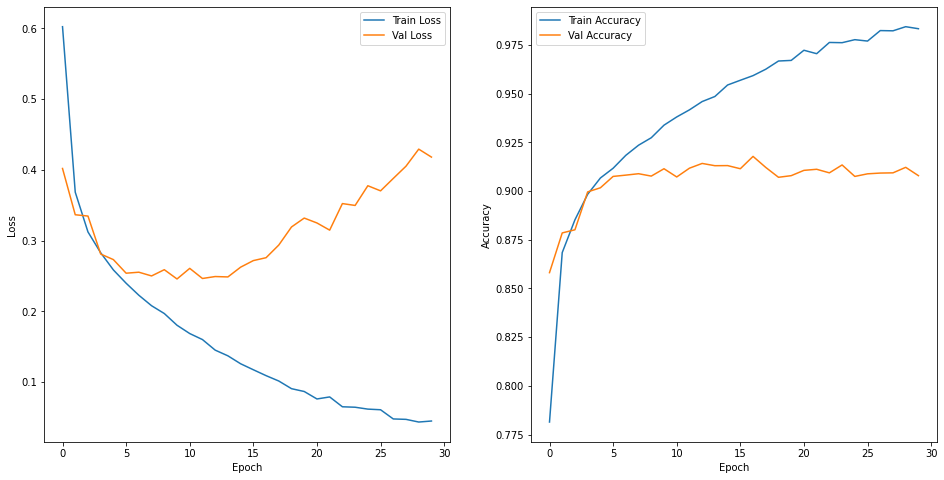

In [13]:
plot_history(history)

Val Loss 감소 -> 증가  
--> overfitting( 과적합 ) 발생 -> 학습량이 너무 많다라고 생각할 수 있음

## Drop out
오버피팅( 과적합 )을 수정하기 위해서 Dropout 레이어를 추가한 모델 학습  
- 학습한 내용 중 일부를 버림
- Overfitting( 과적합 ) 조절

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

def build_dropout_model():
  model = keras.Sequential()
  model.add(layers.Conv2D(filters=16, kernel_size= 3, 
   strides=(1, 1), padding='same', activation='relu', 
   input_shape=(28, 28, 1)))
  model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
  model.add(layers.Dropout(0.2)) #Dropout 레이어 추가

  model.add(layers.Conv2D(filters=32, kernel_size= 3, 
   strides=(1, 1), padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
  model.add(layers.Dropout(0.2)) #Dropout 레이어 추가

  model.add(layers.Conv2D(filters=64, kernel_size= 3, 
   strides=(1, 1), padding='same', activation='relu'))
  model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
  model.add(layers.Dropout(0.2)) # Dropout 레이어 추가가

  model.add(layers.Flatten())
  
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(10, activation = 'softmax'))
  return model

In [16]:
model = build_dropout_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

In [17]:
# 컴파일 및 학습
model.compile(optimizer='adam',
 loss = 'categorical_crossentropy', 
 metrics=['acc'])

In [18]:
EPOCHS = 30
BATCH_SIZE = 64
history = model.fit(X_train, y_train_oh, 
 epochs = EPOCHS, 
 batch_size = BATCH_SIZE, 
 validation_data = (X_val, y_val_oh),
 verbose = 1)

Epoch 1/30
657/657 [==============================] - 5s 6ms/step - loss: 0.7127 - acc: 0.7339 - val_loss: 0.4601 - val_acc: 0.8412
Epoch 2/30
657/657 [==============================] - 5s 8ms/step - loss: 0.4547 - acc: 0.8327 - val_loss: 0.3719 - val_acc: 0.8704
Epoch 3/30
657/657 [==============================] - 6s 10ms/step - loss: 0.3998 - acc: 0.8508 - val_loss: 0.3333 - val_acc: 0.8759
Epoch 4/30
657/657 [==============================] - 5s 8ms/step - loss: 0.3693 - acc: 0.8653 - val_loss: 0.3222 - val_acc: 0.8811
Epoch 5/30
657/657 [==============================] - 6s 10ms/step - loss: 0.3463 - acc: 0.8712 - val_loss: 0.3178 - val_acc: 0.8827
Epoch 6/30
657/657 [==============================] - 4s 7ms/step - loss: 0.3267 - acc: 0.8791 - val_loss: 0.2933 - val_acc: 0.8909
Epoch 7/30
657/657 [==============================] - 4s 6ms/step - loss: 0.3128 - acc: 0.8852 - val_loss: 0.2790 - val_acc: 0.8978
Epoch 8/30
657/657 [==============================] - 4s 7ms/step - loss: 

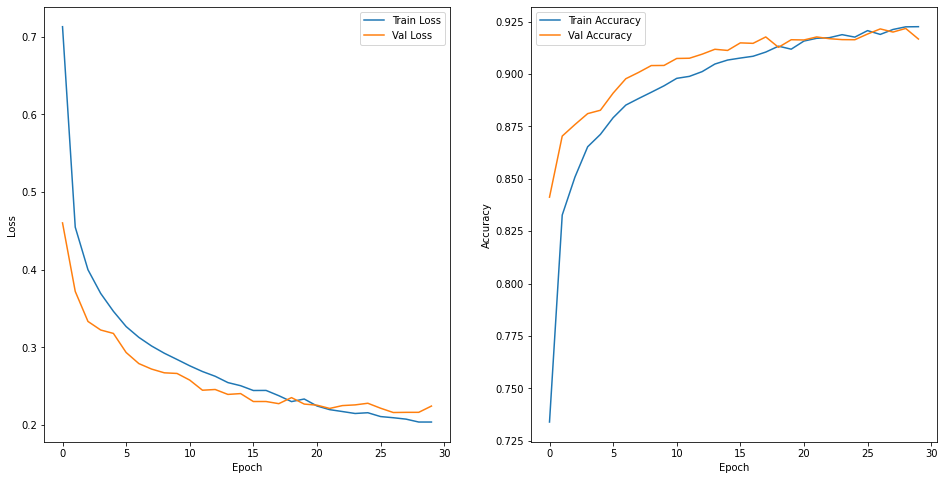

In [19]:
plot_history(history)

In [20]:
# 예측
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)

y_pred_argmax[:10]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_score(y_test, y_pred):
  print('accuarcy: %.3f' % (accuracy_score(y_test, y_pred)))
  print('precision: %.3f' % (precision_score(y_test, y_pred, average='macro')))
  print('recall_score: %.3f' % (recall_score(y_test, y_pred, average='macro')))
  print('f1_score: %.3f' % (f1_score(y_test, y_pred, average='macro')))

print_score(y_test, y_pred_argmax)

accuarcy: 0.911
precision: 0.911
recall_score: 0.911
f1_score: 0.909


## 원 핫 인코딩 제외

In [24]:
# 모델 생성
model = build_dropout_model()


In [25]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', 
              # 손실함수 원핫 인코딩 쓸 때는 categorical_crossentropy 썼었음음
              metrics=['acc'])


In [27]:
#모델학습
EPOCHS = 15
BATCH_SIZE = 64
history = model.fit(X_train, y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (X_val, y_val),
                    verbose = 1)

Epoch 1/15
657/657 [==============================] - 4s 7ms/step - loss: 0.4444 - acc: 0.8363 - val_loss: 0.3678 - val_acc: 0.8662
Epoch 2/15
657/657 [==============================] - 5s 7ms/step - loss: 0.3934 - acc: 0.8542 - val_loss: 0.3342 - val_acc: 0.8762
Epoch 3/15
657/657 [==============================] - 5s 7ms/step - loss: 0.3609 - acc: 0.8657 - val_loss: 0.3197 - val_acc: 0.8821
Epoch 4/15
657/657 [==============================] - 4s 7ms/step - loss: 0.3405 - acc: 0.8745 - val_loss: 0.2916 - val_acc: 0.8946
Epoch 5/15
657/657 [==============================] - 4s 6ms/step - loss: 0.3208 - acc: 0.8816 - val_loss: 0.2781 - val_acc: 0.8984
Epoch 6/15
657/657 [==============================] - 4s 6ms/step - loss: 0.3083 - acc: 0.8855 - val_loss: 0.2823 - val_acc: 0.8954
Epoch 7/15
657/657 [==============================] - 4s 6ms/step - loss: 0.2931 - acc: 0.8897 - val_loss: 0.2648 - val_acc: 0.9026
Epoch 8/15
657/657 [==============================] - 4s 7ms/step - loss: 0.

In [28]:
# 예측
y_pred = model.predict(X_test)
y_pred[:1]

313/313 [==============================] - 1s 3ms/step


array([[2.8543562e-05, 2.1772827e-08, 1.7854740e-06, 7.8086504e-07,
        7.2769978e-07, 7.6903641e-04, 3.4872571e-06, 8.1256106e-03,
        9.7643651e-06, 9.9106020e-01]], dtype=float32)

In [29]:
# 평가지표 계산
y_pred_argmax = np.argmax(y_pred, axis=1)
print_score(y_test, y_pred_argmax)


accuarcy: 0.907
precision: 0.909
recall_score: 0.907
f1_score: 0.906



CNN에서 Dropout 적용  

|이미지 데이터 다중 분류 기법|accuracy|precisional|recall_score|f1_score|
|------|---:|---:|---:|---:|
|DNN|0.877|0.878|0.877|0.877|
|CNN(원핫인코딩X)|0.907|0.909|0.907|0.906|
|CNN(원핫인코딩O)|0.911|0.911|0.911|0.909|